In [14]:
# 创造合成数据集
from sklearn.datasets import make_classification
import numpy as np

X, y = make_classification(
    n_samples=200000,
    n_features=100,
    n_classes=4,
    n_clusters_per_class=1,        # 简化为每类1簇
    n_informative=20,              # 提升有效特征数量
    class_sep=2.0,                 # 增加类间隔
    flip_y=0,                      # 防止标签噪声
    random_state=1024
)

X.shape, y.shape
xy = np.concatenate((X, y.reshape(-1, 1)), axis=1)
np.savetxt("synthetic_dataset.csv", xy, delimiter=",")

In [18]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import contingency_matrix
import time  # 导入时间模块

# 加载数据
xy = np.loadtxt("synthetic_dataset.csv", delimiter=",")
X = xy[:, :-1]
y_true = xy[:, -1].astype(int)

# 创建并训练 KMeans 模型
model = KMeans(n_clusters=4, verbose=2, max_iter=50, tol=0.001, init='k-means++')

start_time = time.perf_counter()
model.fit(X)
end_time = time.perf_counter()

# 获取聚类标签
labels = model.labels_

# 将聚类标签保存到文件中
np.savetxt("cluster_labels_py.csv", labels, delimiter=",", fmt="%d")

# 计算最佳匹配精度
def compute_best_matching_accuracy(y_true, y_pred):
    # 计算混淆矩阵
    contingency = contingency_matrix(y_true, y_pred)
    # 找到每行（真实标签）对应的最大列（聚类标签）
    mapping = {true_label: pred_label for true_label, pred_label in enumerate(np.argmax(contingency, axis=1))}
    # 根据映射计算匹配的样本数
    matched = sum(1 for true, pred in zip(y_true, y_pred) if mapping[true] == pred)
    return matched / len(y_true)

accuracy = compute_best_matching_accuracy(y_true, labels)

print("聚类结果已保存到 cluster_labels_py.csv 文件中")
print("聚类耗时：{:.6f} 毫秒".format((end_time - start_time) * 1000))
print("聚类最佳匹配精度：{:.4f}".format(accuracy))

Initialization complete
Iteration 0, inertia 94245129.85706173.
Iteration 1, inertia 60016065.63500412.
Iteration 2, inertia 58967897.66768171.
Iteration 3, inertia 58542000.64626642.
Iteration 4, inertia 58249041.53957526.
Iteration 5, inertia 58000759.45356795.
Iteration 6, inertia 57786750.69504966.
Iteration 7, inertia 57619329.11598393.
Iteration 8, inertia 57491874.655954055.
Iteration 9, inertia 57396025.27944035.
Iteration 10, inertia 57323744.96120247.
Iteration 11, inertia 57270308.28877287.
Iteration 12, inertia 57230872.21934758.
Iteration 13, inertia 57199876.05736427.
Iteration 14, inertia 57176157.4037464.
Iteration 15, inertia 57157836.56094914.
Iteration 16, inertia 57142931.32496161.
Iteration 17, inertia 57131336.98392749.
Iteration 18, inertia 57122394.9729318.
Iteration 19, inertia 57114917.419904344.
Iteration 20, inertia 57108867.42220818.
Iteration 21, inertia 57104299.51472923.
Iteration 22, inertia 57100581.970382094.
Iteration 23, inertia 57097565.43559685.
I

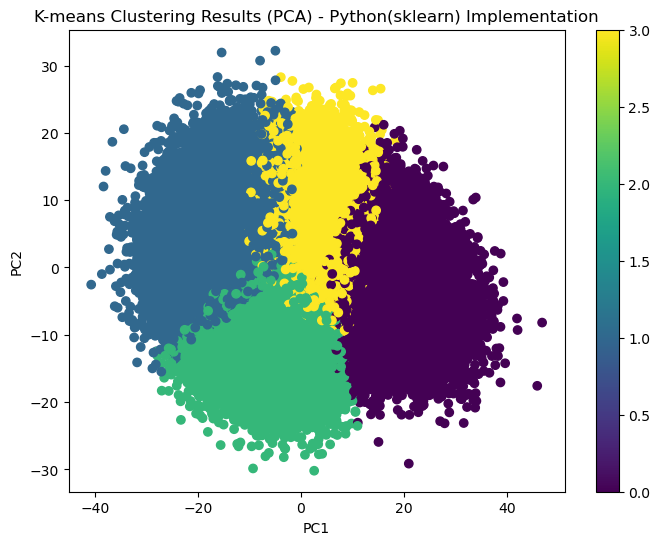

In [19]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 加载原始数据和聚类标签
xy = np.loadtxt("synthetic_dataset.csv", delimiter=",")
labels = np.loadtxt("cluster_labels_py.csv")

# 提取特征
X = xy[:, :-1]

# 使用PCA降维到2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# 可视化
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
plt.colorbar(scatter)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-means Clustering Results (PCA) - Python(sklearn) Implementation')
plt.show()

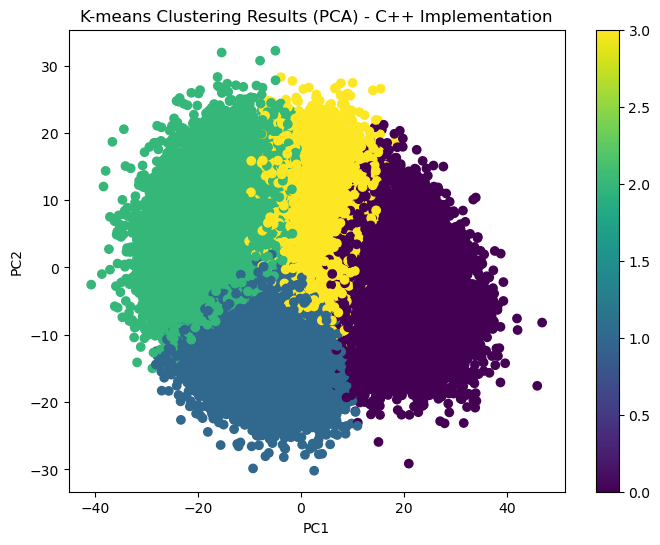

In [20]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 加载原始数据和聚类标签
xy = np.loadtxt("synthetic_dataset.csv", delimiter=",")
labels = np.loadtxt("cluster_labels_cpp.csv")

# 提取特征
X = xy[:, :-1]

# 使用PCA降维到2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# 可视化
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
plt.colorbar(scatter)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-means Clustering Results (PCA) - C++ Implementation')
plt.show()

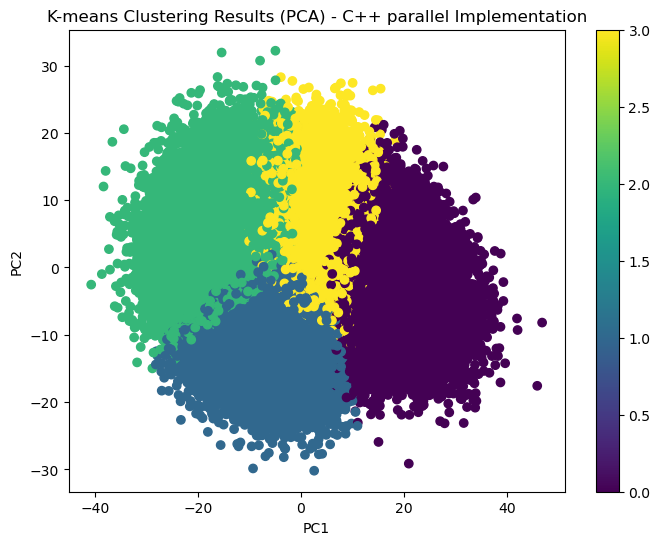

In [21]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 加载原始数据和聚类标签
xy = np.loadtxt("synthetic_dataset.csv", delimiter=",")
labels = np.loadtxt("cluster_labels_parallel_cpp.csv")

# 提取特征
X = xy[:, :-1]

# 使用PCA降维到2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# 可视化
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
plt.colorbar(scatter)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-means Clustering Results (PCA) - C++ parallel Implementation')
plt.show()